<a href="https://colab.research.google.com/github/SantiagoM1227/IIT-2022-I/blob/main/LL_avance_centrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicialización



In [7]:
#init
from matplotlib import pyplot as pl 
import numpy as np
from numpy.linalg import eig
import math as math

#tweaks
a=1
pi = np.pi
I = 0+1j

In [58]:
#plots
def plotenergies(E,x_lim,y_lim):
  E = np.real(E)
  l = len(E)
  Energy = np.sort(E)
  x=np.linspace(1,l,l)
  pl.xlabel("Eigenvalue Number") 
  pl.ylabel("Energies") 
  pl.xlim([0, x_lim])
  pl.ylim([0, y_lim])
  pl.scatter(x,Energy) 
  pl.show()
def plotdensities(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi = eigenstates(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Mobius(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Mobius = eigenstates_Mobius(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Mobius)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Cylinder(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Cylinder = eigenstates_Cylinder(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Cylinder)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()
def plotdensities_Torus(Matrix,N,steps,level):
    x = np.linspace(0,1,steps+1) #a =1
    Psi_Torus = eigenstates_Torus(Matrix,N,steps,level)
    pl.figure(figsize=(8,8))
    fig = pl.contour(x,x,np.square(np.abs(Psi_Torus)),500)
    ax = pl.axes()
    ax.set_facecolor("black")
    pl.tight_layout()


## Cuadrado

In [70]:
N = 50 #Matrix truncation
G = 30 #should be less than N
epsilon = 10**(-3)#epsilon for hyperbolic trap

In [71]:
#square

#Auxiliary functions
def g_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  return value

def g_e(n,nn):
  if (n+nn)%2==0:
    term1 = 1/(n-nn)**2
    term2 = 1/(n+nn)**2
    value = term1-term2
  else: 
    value = 0
  return value

def f_o(n,nn):
  if (n+nn)%2==0:
    value = 0
  else: 
    num = n*nn
    den = n**2-nn**2
    value = num/den
  return value

In [72]:
#4D hamiltonian matrix elements
def H_n_nn_m_mm(n,nn,m,mm):
    if mm==m:
        if nn==n:
            element = (n**2)+(m**2)+((G**2)/2)*((1/3)-((1/(pi*n))**2)-((1/(pi*m)**2)))
        else: 
            element = 2*(G/pi)**2*(g_e(n,nn))
    else: 
        if n==nn:
            element = 2*(G/pi)**2*(g_e(m,mm))
        else:
            element = -I*(16*G/(pi**3))*(g_o(n,nn)*f_o(m,mm)-g_o(m,mm)*f_o(n,nn))
    return element

H_n_nn_m_mm(1,1,1,1)

60.810934721896

In [73]:
#4D NxNxNxN matrix to 2D NxN matrix of 2D NxN matrices  N is the precission
def H_m_mm_Matrix(m,mm,N):
  H_block = np.zeros((N,N),dtype=complex)
  if m==mm:
    for n in range(N):
      H_block[n][n] = H_n_nn_m_mm(n+1,n+1,m+1,mm+1)
      for nn in range (N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  else: 
    for n in range(N):
      for nn in range(N):
        H_block[n][nn] = H_n_nn_m_mm(n+1,nn+1,m+1,mm+1)
  return H_block

In [74]:
#Break blocks
def H_matrix(N):
    Zero = np.zeros((N,N),dtype = complex)
    H = [[Zero for _ in range(N)] for _ in range(N)] #NxN "matrix of matrices" of NxN zero matrices
    #fill upper triangular blocks and leave zeros everywhere
    for m in range(N):
      H[m][m] = H_m_mm_Matrix(m,m,N) #diagonal 
      for mm in range(m+1,N):
        H[m][mm] = H_m_mm_Matrix(m,mm,N) #upper triangle
    H = np.matrix(np.block(H)) #from block to matrix
    H_final = np.triu(H)+ np.tril(np.conj(H.T),-1) #Make Hermitian
    #quality control
    print(H_final)
    print(np.size(H_final,1))
    return H_final

In [75]:
def eigenstates(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = np.array([np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range (N)])
            Psi_x = np.array([np.sqrt(2)*np.sin((t+1)*pi*x[j]) for t in range (N)])
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out


In [76]:
#calculate
H = H_matrix(N)

[[  60.81093472+0.00000000e+00j    0.        +0.00000000e+00j
    34.19589948+0.00000000e+00j ...    0.        +8.79424449e-07j
     0.        +0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j   98.0068342 +0.00000000e+00j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
     0.        +8.62540075e-07j    0.        +0.00000000e+00j]
 [  34.19589948+0.00000000e+00j    0.        +0.00000000e+00j
   109.33940818+0.00000000e+00j ...    0.        +2.76513527e-06j
     0.        +0.00000000e+00j    0.        +9.58788671e-08j]
 ...
 [   0.        -8.79424449e-07j    0.        +0.00000000e+00j
     0.        -2.76513527e-06j ... 4953.96197289+0.00000000e+00j
     0.        +0.00000000e+00j   45.57554283+0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.        -8.62540075e-07j
     0.        +0.00000000e+00j ...    0.        +0.00000000e+00j
  5050.96277238+0.00000000e+00j    0.        +0.00000000e+00j]
 [   0.        +0.00000000e+00j    0.   

In [77]:
#solve matrix
E, V = eig(H)

In [78]:
index = np.argsort(np.real(E))
print(index)

[254 435 436 ...   1   0   2]


In [79]:
C = V[:,index]

In [80]:
A = (C[:,1])
print(C[:,1],np.size(2))

[-8.97994891e-09+9.07210423e-07j -2.15744029e-08+3.63776408e-01j
 -4.93266525e-08-3.80638315e-06j ...  2.96264941e-15-7.99908752e-17j
 -4.47654605e-11+4.72648859e-17j  1.75238616e-15-4.78580732e-17j] 1


In [81]:
D = np.sort(E)

In [82]:
print(D[470])

(631.9264043334548+6.881226629749576e-14j)


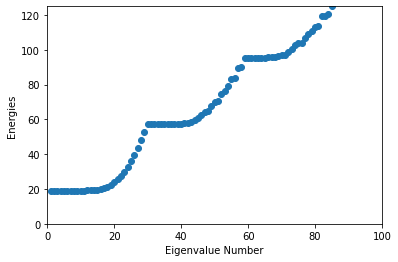

In [83]:
#print & plot
plotenergies(D,100,125)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


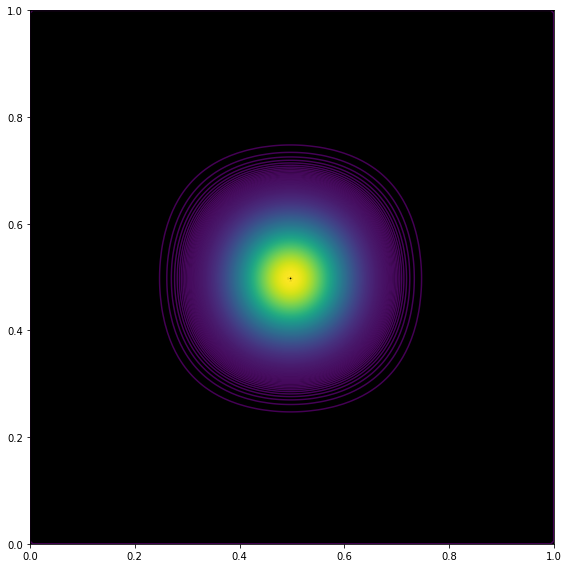

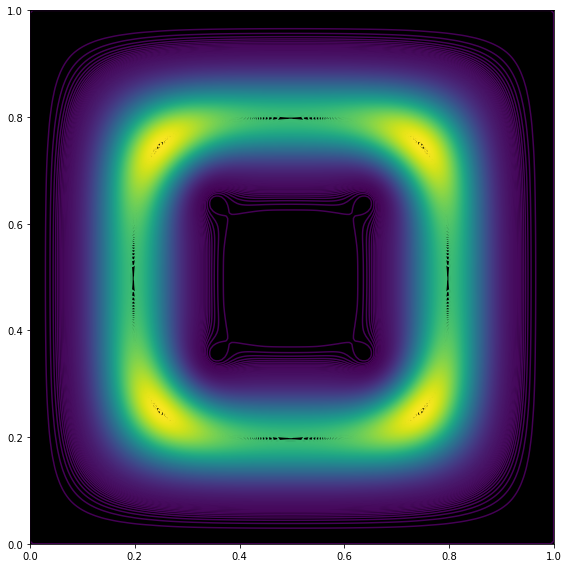

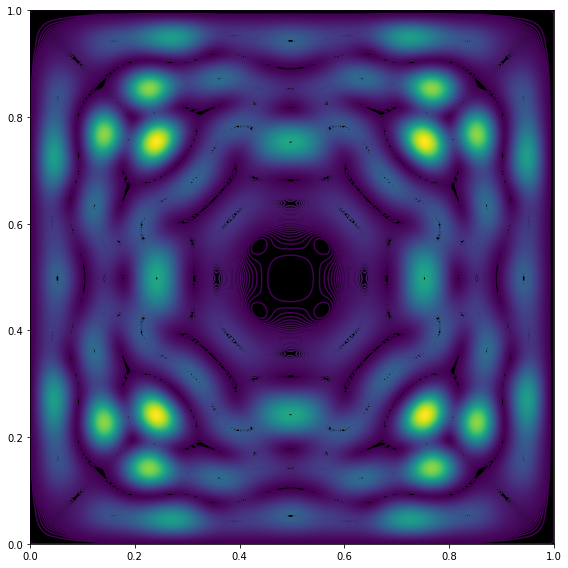

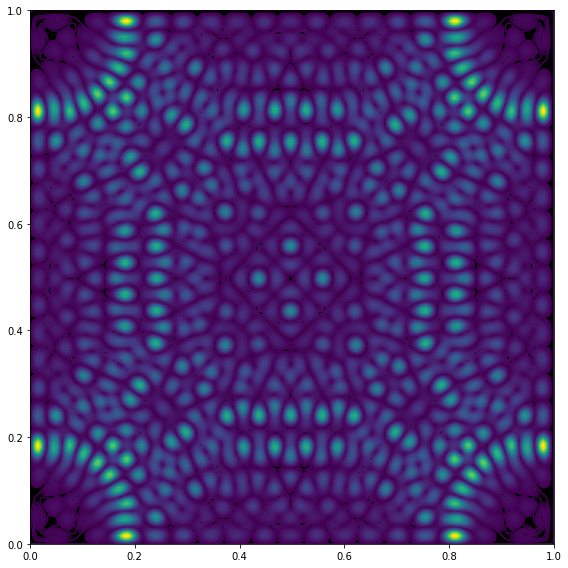

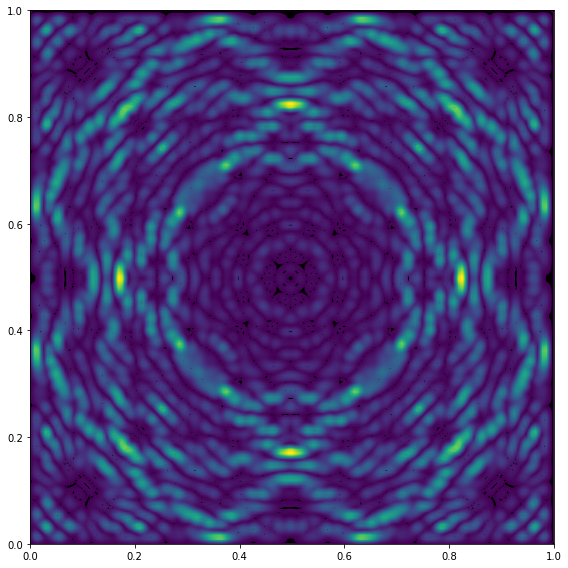

In [84]:
Numbers = [0,10,100,1000,2000]
for i in Numbers:
  plotdensities(C,N,200,i)

## Cinta de Möbius

In [9]:
N = 50 #Matrix truncation
G = 30 #should be less than N
epsilon = 10**(-3)#epsilon for hyperbolic trap

In [11]:
#auxiliary functions
def oscMOB(m,mm):
  if m==mm:
    out = 1/12
  else: 
    num = 2
    den = ((m-mm)**2)*(pi**2)
    out = num/den
  return out
def angMOB(m, mm,n,nn):
  if (nn+n)%2==0:
    out = 0
  else: 
    num = 8*(n*nn)
    den = (n**2-nn**2)*((m-mm)**2)*pi**2
    out = num/den
  return out
  

In [4]:
#Möbius Hamiltonian matrix elements
def Mobius_H(k,l): #k,l indices of N*N X N*N matrix
    m=k//N -(N//2) # also negative indices
    n=(2*(k%N))+((m+1)%2)  #|m,n>
    if n%2==0:
      n = n+2
    mm=l//N -(N//2) 
    nn=(2*(l%N))+((mm+1)%2) #<mm,nn|
    if nn%2==0:
      nn = nn+2
    if n==nn:
      element = 4*G**2*oscMOB(m,mm)
      if m==mm:
        element = element + m**2+n**2
    else:
      element = -I*(4*G/np.pi)*angMOB(m,mm,n,nn)
    return element
def trapMOB(k,l):
    m=k//N -(N//2) # also negative indices
    n=(2*(k%N))+((m+1)%2)  #|m,n>
    if n%2==0:
      n = n+2
    mm=l//N -(N//2) 
    nn=(2*(l%N))+((mm+1)%2) #<mm,nn|
    if nn%2==0:
      nn = nn+2
    C = (pi*epsilon/2)**2
    if n==nn:
      if m==mm:
        out = (1/6)*(1-(3/(n*pi)**2))
      else:
        out = 2/((pi*(m-mm))**2)
    else: 
      if m==mm:
        out = 8*n*nn/(((n**2-nn**2)**2)*pi**2)
      else:
        out = 0
    return C*out

In [5]:
def H_Mobius_Matrix(N):
  H_Mobius = np.zeros((N*N,N*N),dtype=complex)
  for k in range(N*N):
    for l in range(0,k+1):
      H_Mobius[k,l]= Mobius_H(k,l)+trapMOB(k,l)
  for k in range(N*N):
    for l in range(k+1,N*N):
      H_Mobius[k,l]= np.conj(H_Mobius[l,k])
  return H_Mobius

In [12]:
H_Mobius = H_Mobius_Matrix(N)

In [13]:
print(H_Mobius,H_Mobius[1550,420])

[[9.29000000e+02+0.j         1.11111111e-07-0.j
  2.34375000e-08-0.j         ... 0.00000000e+00+0.0002716j
  0.00000000e+00+0.00026599j 0.00000000e+00+0.00026062j]
 [1.11111111e-07+0.j         9.41000000e+02+0.j
  1.20000000e-07-0.j         ... 0.00000000e+00+0.00054392j
  0.00000000e+00+0.00053267j 0.00000000e+00+0.00052187j]
 [2.34375000e-08+0.j         1.20000000e-07+0.j
  9.61000000e+02+0.j         ... 0.00000000e+00+0.0008177j
  0.00000000e+00+0.00080071j 0.00000000e+00+0.00078441j]
 ...
 [0.00000000e+00-0.0002716j  0.00000000e+00-0.00054392j
  0.00000000e+00-0.0008177j  ... 9.90100000e+03+0.j
  1.24986437e-07-0.j         3.12367148e-08-0.j        ]
 [0.00000000e+00-0.00026599j 0.00000000e+00-0.00053267j
  0.00000000e+00-0.00080071j ... 1.24986437e-07+0.j
  1.02850000e+04+0.j         1.24986985e-07-0.j        ]
 [0.00000000e+00-0.00026062j 0.00000000e+00-0.00052187j
  0.00000000e+00-0.00078441j ... 3.12367148e-08+0.j
  1.24986985e-07+0.j         1.06770000e+04+0.j        ]] 0.0013

In [14]:
#Verify Hermiticity
H_Mobius-np.conj(H_Mobius.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [15]:
#Solve matrix 
E_Mobius, V_Mobius = eig(H_Mobius)

In [16]:
print(E_Mobius) 

[16368.38531442-8.80840061e-19j 16167.75461884-8.08904111e-17j
 15875.01684568-1.61297065e-14j ...   556.00258065+2.74653635e-15j
   573.57735428+1.28109328e-13j   556.78608482-2.50495832e-15j]


In [17]:
EE = np.sort(np.real(E_Mobius))
print(EE)

[1.18910031e+01 1.36389102e+01 1.60847126e+01 ... 1.58750168e+04
 1.61677546e+04 1.63683853e+04]


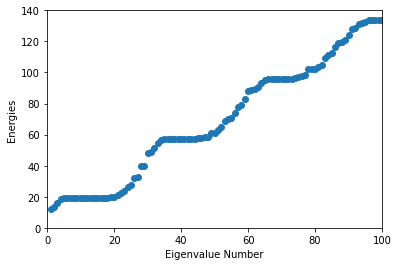

In [18]:
#print & plot
plotenergies(EE,100,140) 

In [19]:
def oddonly(Matrix):
    N = np.size(Matrix,1)
    MMatrix = np.zeros([N,2*N], dtype = complex)
    if (N//2)%2==1:
      for i in range(N):
        for j in range(N):
          if i%2==0:
            MMatrix[i,2*j+1] = Matrix[i,j]
          else:
            MMatrix[i,2*j] = Matrix[i,j]
    else: 
      for i in range(N):
        for j in range(N):
          if i%2==0:
            MMatrix[i,2*j] = Matrix[i,j]
          else:
            MMatrix[i,2*j+1] = Matrix[i,j]                              
    return MMatrix

In [20]:
#test 
R_even = np.random.randint(10, size = (4,4) )
R_even[R_even==0] = 1
print(R_even)
ODDONLY_R_even = oddonly(R_even)
print(ODDONLY_R_even)

R_odd = np.random.randint(10, size = (3,3) )
R_odd[R_odd==0] = 1
print(R_odd)
ODDONLY_R_odd = oddonly(R_odd)
print(ODDONLY_R_odd)

[[7 1 3 4]
 [7 4 1 4]
 [1 6 1 1]
 [3 8 4 8]]
[[7.+0.j 0.+0.j 1.+0.j 0.+0.j 3.+0.j 0.+0.j 4.+0.j 0.+0.j]
 [0.+0.j 7.+0.j 0.+0.j 4.+0.j 0.+0.j 1.+0.j 0.+0.j 4.+0.j]
 [1.+0.j 0.+0.j 6.+0.j 0.+0.j 1.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 3.+0.j 0.+0.j 8.+0.j 0.+0.j 4.+0.j 0.+0.j 8.+0.j]]
[[6 6 5]
 [8 1 1]
 [5 8 3]]
[[0.+0.j 6.+0.j 0.+0.j 6.+0.j 0.+0.j 5.+0.j]
 [8.+0.j 0.+0.j 1.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 5.+0.j 0.+0.j 8.+0.j 0.+0.j 3.+0.j]]


In [21]:
def eigenstates_Mobius(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex)
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    MMatrix = oddonly(Matrix) # only linear combinations of odd-summing indices 
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(2*N)]
            Psi_x = [np.exp(I*(t-N//2)*pi*x[j]) for t in range(N)] #account for negative states
            A = np.matmul(MMatrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [22]:
index = np.argsort(EE)
print(index)

[   0    1    2 ... 2497 2498 2499]


In [23]:
C_Mobius = V_Mobius[:,index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


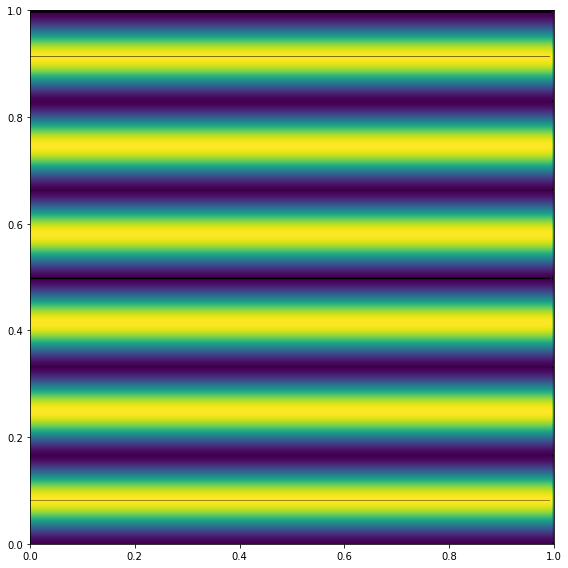

In [24]:
plotdensities_Mobius(np.eye(N*N),N,200,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


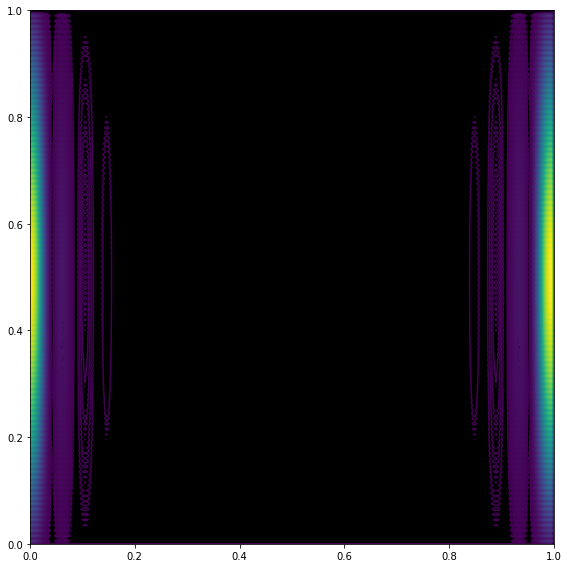

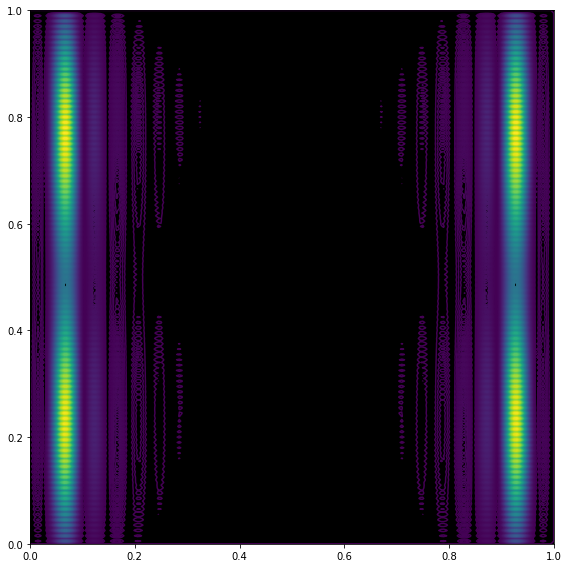

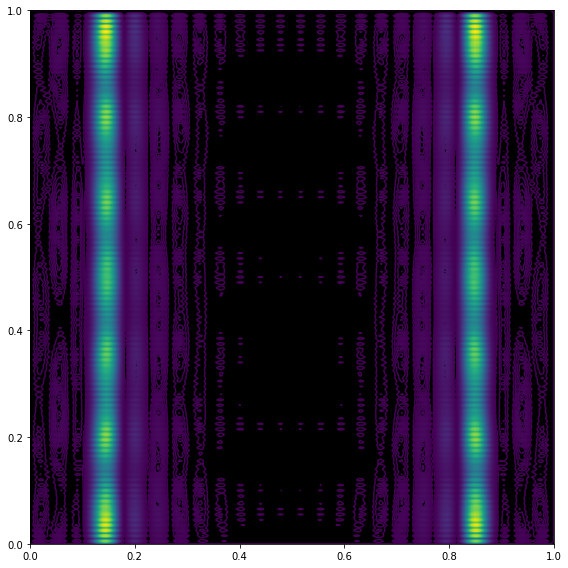

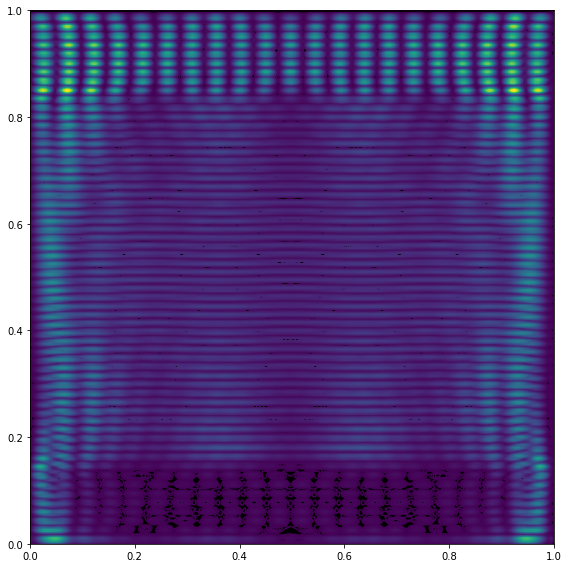

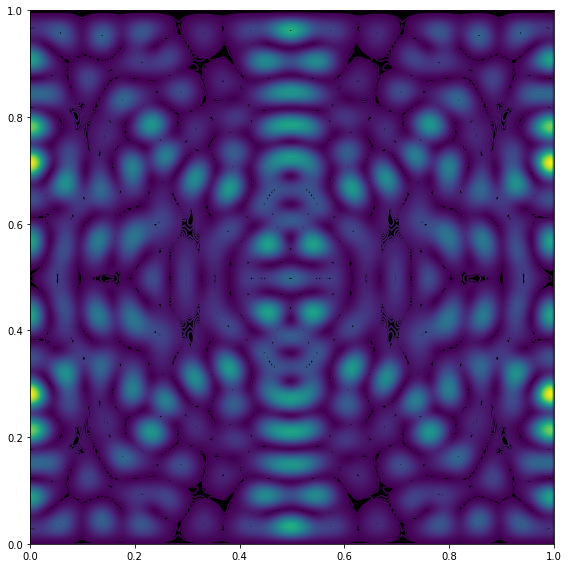

In [25]:
Numbers = [0,10,100,1000,2000]
for i in Numbers:
  plotdensities_Mobius(C_Mobius,N,200,i)


## Cilindro



In [ ]:
N = 50 #Matrix truncation
G = 30 #should be less than N
epsilon = 10**(-3)#epsilon for hyperbolic trap

In [26]:
def oscCYL(m,mm):
  if m==mm:
    return 1/12
  else:
    return 1/(2*(pi**2)*(mm-m)**2)

def angCYL(n,nn,m,mm):
  if (n+nn)%2==0:
    return 0
  else:
    if m==mm:
      return 0
    else:
      return I*2*n*nn/((pi)*(n**2-nn**2)*(mm-m))

In [27]:
def Cylinder_H(k,l):
  m=k//N -N//2
  n=k%N
  mm=l//N -N//2
  nn=l%N 
  element = 0
  if n==nn:
    element += 4*G**2*oscCYL(m,mm)
    if m==mm:
      element += 4*m**2+n**2
  else:
    element -= (I*4*G/np.pi)*angCYL(n,nn,m,mm)
  return element

def H_Cylinder_Matrix(N):
  H_cil = np.zeros((N*N,N*N), dtype=complex)
  for k in range(N*N):
    for l in range(0,k+1):
      H_cil[k,l]= Cylinder_H(k,l)
  for k in range(N*N):
    for l in range(k+1,N*N):
      H_cil[k,l]= np.conj(H_cil[l,k])
  return H_cil

In [28]:
H_Cylinder = H_Cylinder_Matrix(N)

In [ ]:
H_Cylinder

array([[3.70000000e+03   +0.j        , 0.00000000e+00   -0.j        ,
        0.00000000e+00   -0.j        , ...,
        0.00000000e+00   -0.j        , 0.00000000e+00   -0.j        ,
        0.00000000e+00   -0.j        ],
       [0.00000000e+00   +0.j        , 3.70100000e+03   +0.j        ,
        0.00000000e+00  -50.92958179j, ...,
        0.00000000e+00   -0.j        , 1.03433856e-02   -0.j        ,
        0.00000000e+00   -0.j        ],
       [0.00000000e+00   +0.j        , 0.00000000e+00  +50.92958179j,
        3.70400000e+03   +0.j        , ...,
        2.11560544e-02   -0.j        , 0.00000000e+00   -0.j        ,
        2.02895987e-02   -0.j        ],
       ...,
       [0.00000000e+00   +0.j        , 0.00000000e+00   +0.j        ,
        2.11560544e-02   +0.j        , ...,
        5.71300000e+03   +0.j        , 0.00000000e+00-1814.16531342j,
        0.00000000e+00   -0.j        ],
       [0.00000000e+00   +0.j        , 1.03433856e-02   +0.j        ,
        0.00000000e+00

In [29]:
H_Cylinder-np.conj(H_Cylinder.T)

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [30]:
#solve matrix
E_Cylinder, V_Cylinder = eig(H_Cylinder)
print(E_Cylinder)

[7064.56588606+0.j 7064.19347252+0.j 6885.92536924+0.j ...
 1346.34542614+0.j 1224.5027842 +0.j 1228.88282794+0.j]


In [31]:
EE_Cylinder = np.real(E_Cylinder)
print(EE_Cylinder)
D_Cylinder = np.sort(EE_Cylinder)
print(D_Cylinder)

[7064.56588606 7064.19347252 6885.92536924 ... 1346.34542614 1224.5027842
 1228.88282794]
[  19.09859317   19.09859317   19.09859319 ... 6886.24987028 7064.19347252
 7064.56588606]


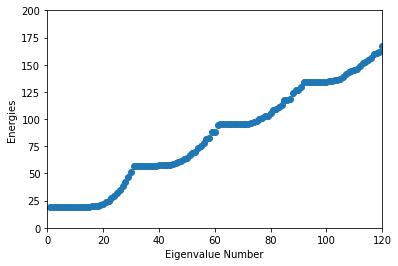

In [32]:
#print & plot
plotenergies(D_Cylinder,120,200) 

In [45]:
def eigenstates_Cylinder(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.sqrt(2)*np.sin((t+1)*pi*y[k]) for t in range(N)]
            Psi_x = [np.cos(2*(t-N//2)*pi*x[j])+np.sin(2*(t-N//2)*pi*x[j])*I for t in range(N)] #allow negatve m states
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [34]:
index_Cylinder = np.argsort(np.real(EE_Cylinder))
print(index_Cylinder)

[526 531 532 ...   3   1   0]


In [35]:
C_Cylinder = V_Cylinder[:,index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


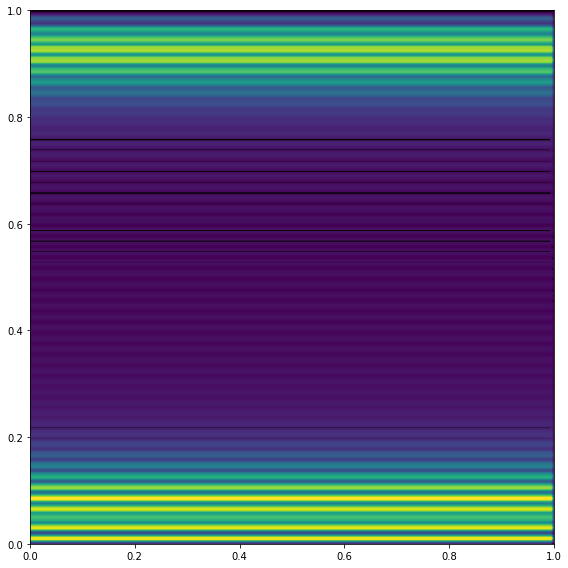

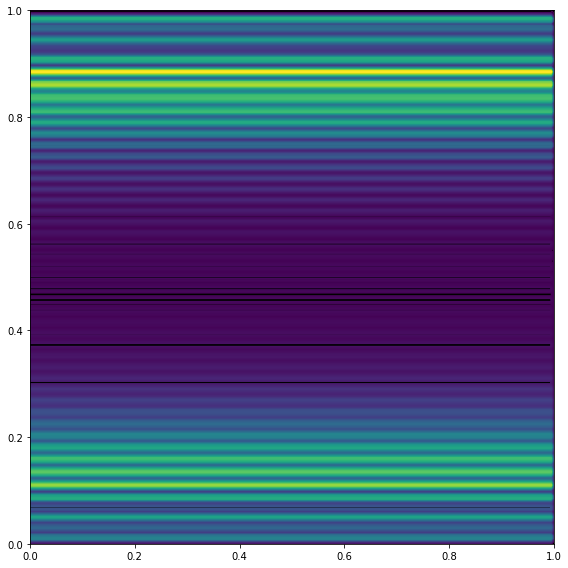

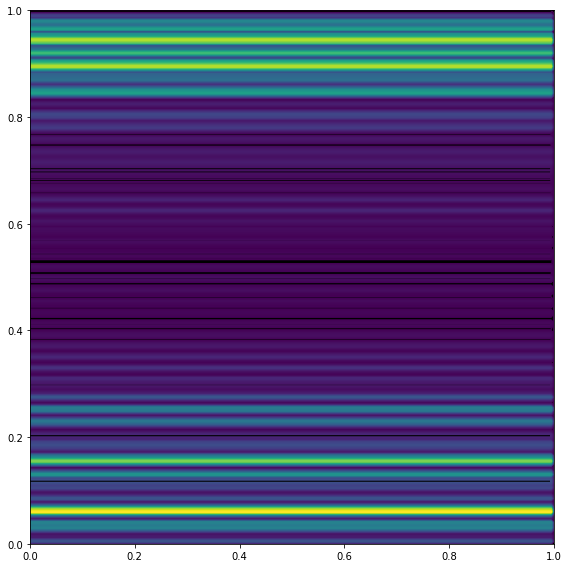

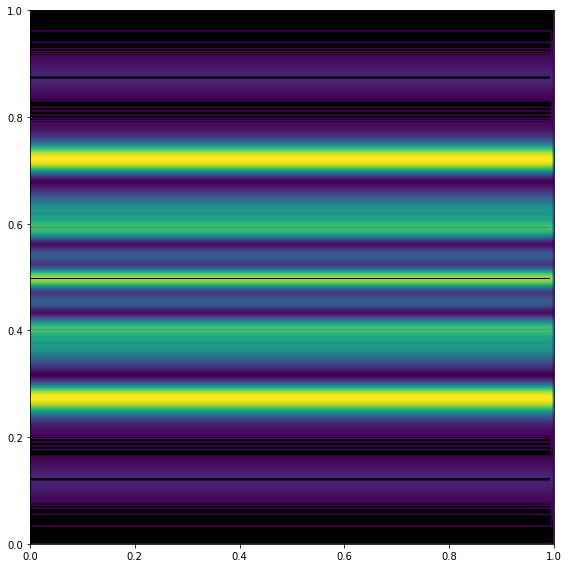

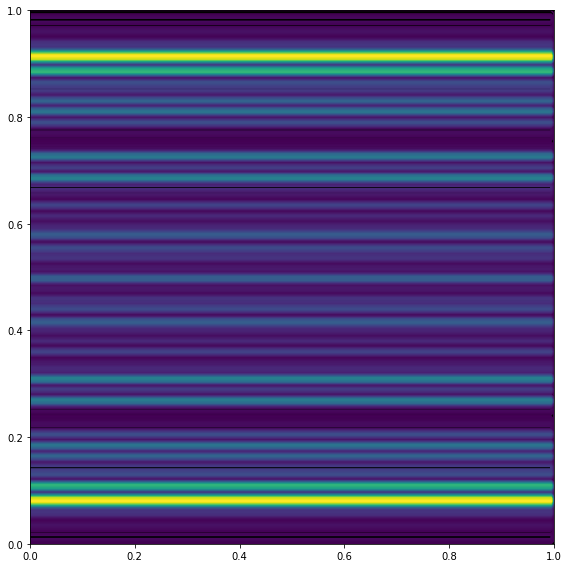

In [36]:
Numbers = [0,10,100,1000,2000]
for i in Numbers:
  plotdensities_Cylinder(C_Cylinder,N,200,i)

## Toroide

In [ ]:
N = 50 #Matrix truncation
G = 30 #should be less than N
epsilon = 10**(-3)#epsilon for hyperbolic trap

In [39]:
def oscTOR(m,mm):
  if m==mm:
    return 1/12
  else:
    return 1/(2*(pi**2)*(mm-m)**2)

def angTOR(n,nn,m,mm):
  if n==nn:
    if m ==mm:
      return 0
    else: 
      return n/(m-mm)
  else: 
    return 0
  

In [60]:
def Torus_H(k,l):
  m=k//N -N//2
  n=k%N
  mm=l//N -N//2
  nn=l%N 
  element = 0
  if n==nn:
    element += 4*G**2*oscTOR(m,mm)
    if m==mm:
      element += 4*m**2+4*n**2
  else:
    element -= (I*4*G/np.pi)*angTOR(n,nn,m,mm)
  return element

def H_Torus_Matrix(N):
  H_cil = np.zeros((N*N,N*N), dtype=complex)
  for k in range(N*N):
    for l in range(0,k+1):
      H_cil[k,l]= Cylinder_H(k,l)
  for k in range(N*N):
    for l in range(k+1,N*N):
      H_cil[k,l]= np.conj(H_cil[l,k])
  return H_cil

In [61]:
H_Torus = H_Torus_Matrix(N)

In [62]:
#solve matrix
E_Torus, V_Torus = eig(H_Torus)
print(E_Torus)

[5364.25756695+0.j 5267.25756695+0.j 5172.25756695+0.j ...
 1806.8732708 +0.j 1807.47889757+0.j 1783.09859317+0.j]


In [63]:
EE_Torus = np.real(E_Torus)
print(EE_Torus)
D_Torus = np.sort(EE_Torus)
print(D_Torus)

[5364.25756695 5267.25756695 5172.25756695 ... 1806.8732708  1807.47889757
 1783.09859317]
[  19.09859317   20.09859317   23.09859317 ... 5173.4043314  5267.25756695
 5364.25756695]


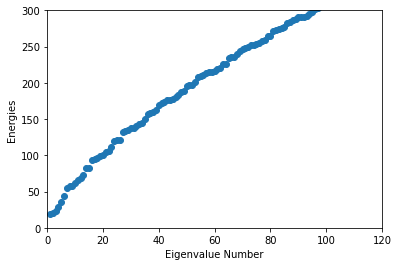

In [64]:
#print & plot
plotenergies(D_Torus,120,300) 

In [65]:
def eigenstates_Torus(Matrix,N,steps,level):
    Psi = np.zeros([steps+1,steps+1], dtype = complex )
    x = np.linspace(0,1,steps)
    y = x
    Matrix = np.reshape(Matrix[:,level],[N,N])
    for j in range(len(x)):
        for k in range(len(y)):
            Psi_y = [np.cos(2*(t-N//2)*pi*y[k])+np.sin(2*(t-N//2)*pi*y[k])*I for t in range(N)]
            Psi_x = [np.cos(2*(t-N//2)*pi*x[j])+np.sin(2*(t-N//2)*pi*x[j])*I for t in range(N)]
            A = np.matmul(Matrix,Psi_y)
            B = np.matmul(np.transpose(Psi_x),A)
            #print(B,np.size(B)) control
            Psi[k,j] = B
    out = Psi
    return out

In [66]:
index_Torus = np.argsort(np.real(EE_Torus))
print(index_Torus)

[114 118 127 ...   3   1   0]


In [67]:
C_Torus = V_Torus[:,index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


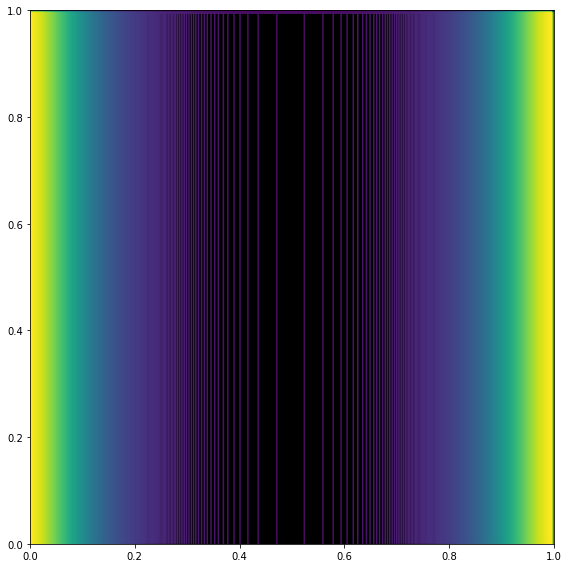

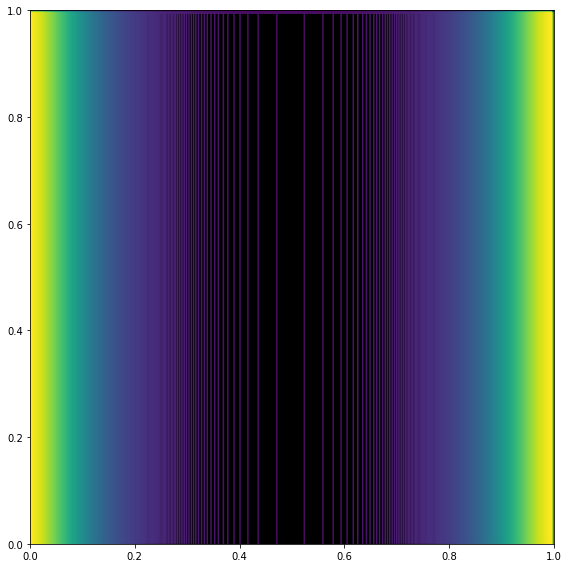

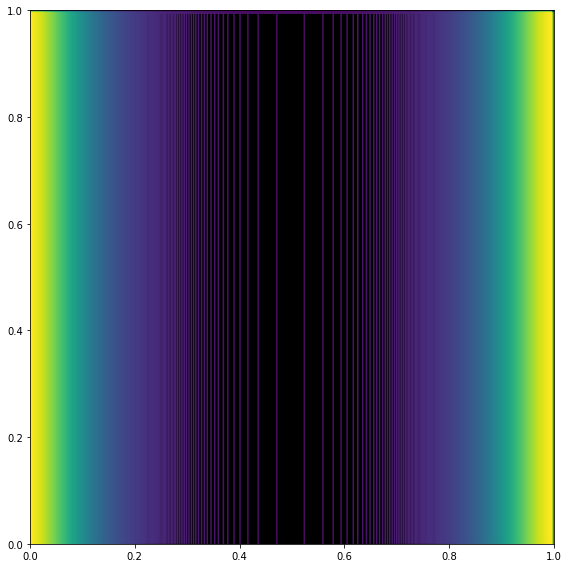

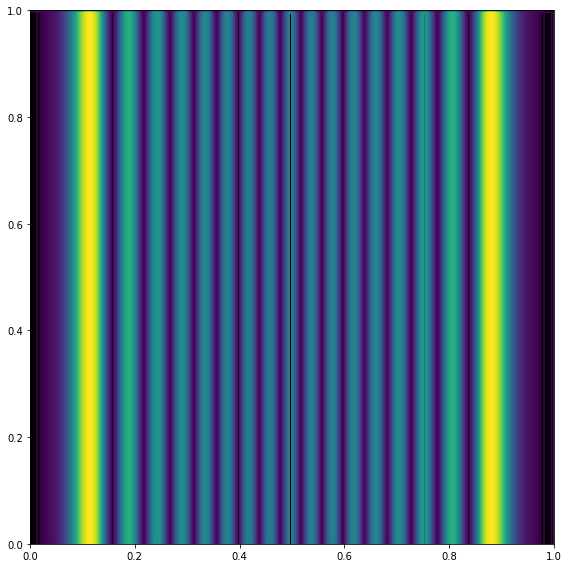

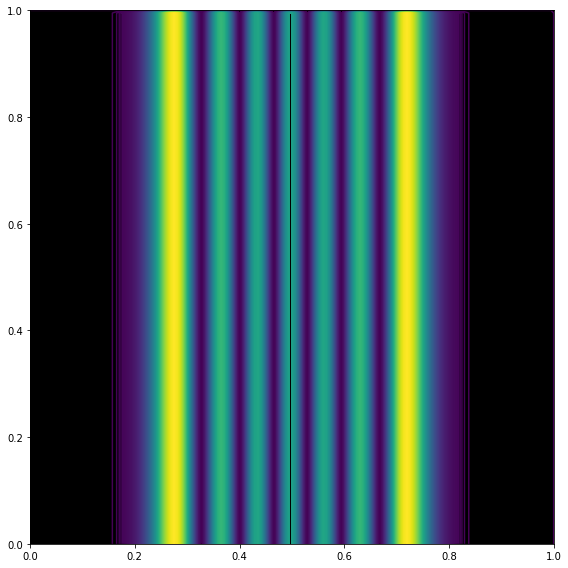

In [68]:
Numbers = [0,10,100,1000,2000]
for i in Numbers:
  plotdensities_Torus(C_Torus,N,200,i)